# 2.1 TIME DISTRIBUTION

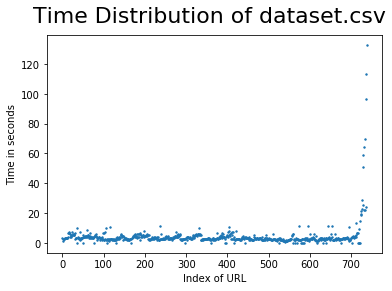

In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math

df=pd.read_csv("dataset.csv")
df.sort_values('time_in_seconds',inplace=True)
plt.scatter(df.index,df.time_in_seconds,s=2)
plt.xlabel("Index of URL")
plt.ylabel("Time in seconds")
plt.suptitle('Time Distribution of dataset.csv', fontsize=22)
plt.show()

## Removing the last 20% and then creating the graph

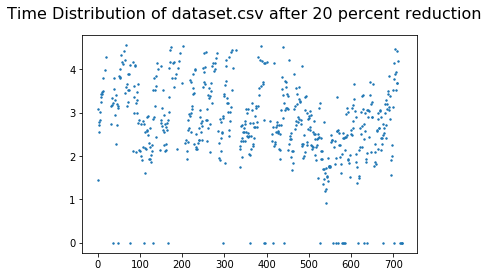

In [5]:
count_row = math.floor(df.shape[0]*0.2)
df.drop(df.tail(count_row).index,inplace=True) # drop last n rows
plt.scatter(df.index,df.time_in_seconds,s=2)
plt.suptitle('Time Distribution of dataset.csv after 20 percent reduction', fontsize=16)
plt.show()

## Removing all the zeros from time_in_seconds column

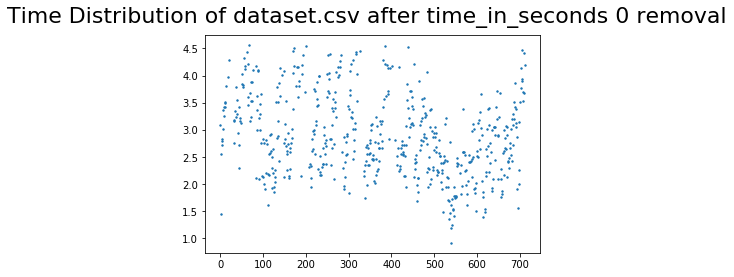

In [6]:
columns = ['time_in_seconds']
df = df.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns).fillna(0)
df.sort_values('time_in_seconds',inplace=True)
plt.scatter(df.index,df.time_in_seconds,s=2)
plt.suptitle('Time Distribution of dataset.csv after time_in_seconds 0 removal', fontsize=22)
plt.show()

# 2.2 TEXT EVALUATION

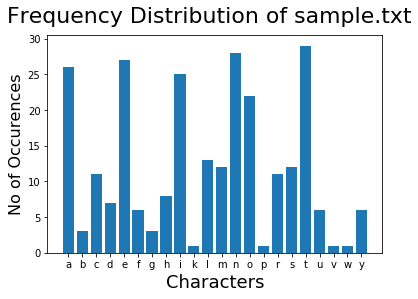

In [7]:
import string
import collections
import matplotlib.pylab as plt
case_sensitive = False
with open('sample.txt', 'r') as f:
	original_text = f.read()
if case_sensitive:
	alphabet = string.ascii_letters
	text = original_text
else:
	alphabet = string.ascii_lowercase
	text = original_text.lower()
alphabet_set = set(alphabet)
counts = dict(collections.Counter(c for c in text if c in alphabet_set))
lists = sorted(counts.items())
x, y = zip(*lists)
plt.bar(x, y)
plt.suptitle('Frequency Distribution of sample.txt', fontsize=22)
plt.xlabel('Characters', fontsize=18)
plt.ylabel('No of Occurences', fontsize=16)
plt.show()

# Removing the top 20% and then creating the graph

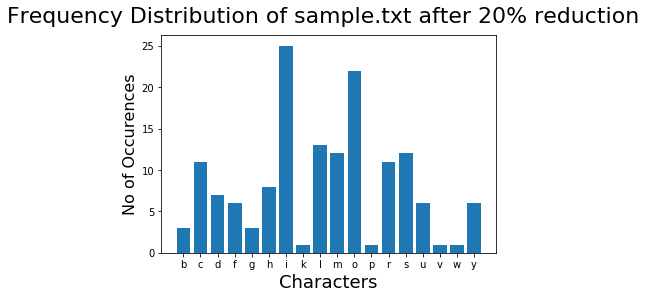

In [8]:
import math
import operator
from collections import OrderedDict
my_dict = {}
for key, value in sorted(counts.items(), key=lambda item: item[1], reverse=True):
    my_dict.update({key:value})
n = math.floor(len(my_dict.items())*0.2)
ordered_dict = OrderedDict(my_dict.items())
for key in list(ordered_dict)[:int(n)]:
    del ordered_dict[key]
lists = sorted(ordered_dict.items())
x, y = zip(*lists)
plt.bar(x, y)
plt.suptitle('Frequency Distribution of sample.txt after 20% reduction', fontsize=22)
plt.xlabel('Characters', fontsize=18)
plt.ylabel('No of Occurences', fontsize=16)
plt.show()